In [1]:
# ignora avisos
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob         
import numpy as np
import seaborn as sb
from os import listdir
from os.path import isfile, join
import matplotlib.ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter

In [2]:
mes = {
    '01': 'JANEIRO',
    '02': 'FEVEREIRO',
    '03': 'MARÇO',
    '04': 'ABRIL',
    '05': 'MAIO',
    '06': 'JUNHO',
    '07': 'JULHO',
    '08': 'AGOSTO',
    '09': 'SETEMBRO',
    '10': 'OUTUBRO',
    '11': 'NOVEMBRO',
    '12': 'DEZEMBRO'
}

sexo_dic = {
    1: 'Homem',
    3: 'Mulher'
}

In [3]:
# carrega arquivo em dafaframe / exclui NaNs
def loadDataFrame(file):
    df = pd.read_csv(file, sep=';')
    df.dropna(inplace = True)
    return df

# prepara dataframe
def prepareDataframe (df, parameter, parameter_dic):
    # exclui colunas irrelevantes
    df = df[['saldomovimentação', parameter]]
    # substitui magic numbers
    df['saldomovimentação'] = df['saldomovimentação'].map({1: 'Admissões', -1: 'Demissões'})
    df[parameter] = df[parameter].map(parameter_dic)
    return df

# gera gráficos
def generateChart(df, parameter, competencia, requisito):
    ax = pd.pivot_table(
        df,
        columns=df['saldomovimentação'],
        index=df[parameter],
        values=parameter,
        aggfunc='count',
        fill_value=0
    ).sort_values(by='Admissões',ascending=True
    ).plot.bar(
        figsize = (10,6),
        color=['#2f4b7c','#f95d6a'],
        xlabel= requisito.title()
    )
    # configuração do gráfico
    ax.legend(bbox_to_anchor=(1, 0), loc='lower right')
    ax.ticklabel_format(axis='y',style='plain', )
    plt.xticks(rotation=0)
    # insere thousand separator
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(
        lambda x, p: format(int(x), ',')))
    ax.set_title("PESSOAS ADMITIDAS E DEMITIDAS POR " + requisito.upper() + " EM "+ competencia)

In [4]:
# verificar arquivos com o padrão CAGEDMOV no diretorio
diretorio = "/Users/mariaclara1985/Documents/3_fatec_bd/6SEM/bd-n-estruturado/novocaged"
arquivos = [f for f in listdir(diretorio) if isfile(join(diretorio, f)) and 'CAGEDMOV' in f]
arquivos.sort()

# 1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:


## - Gênero

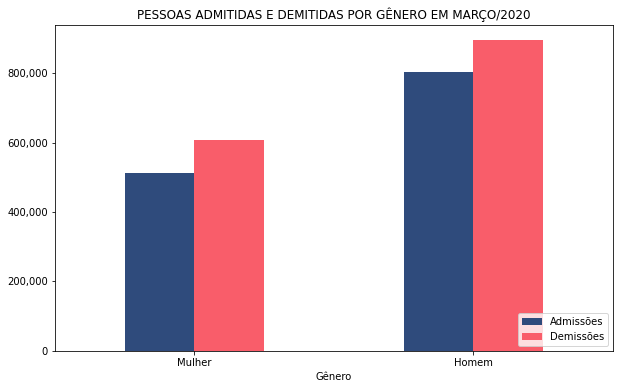

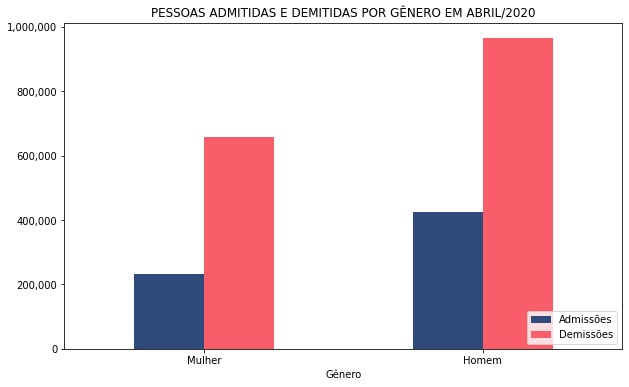

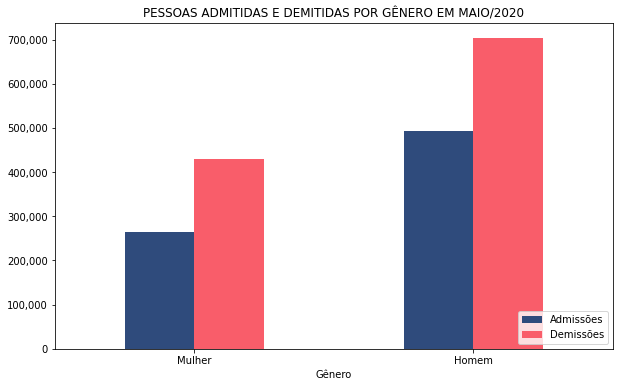

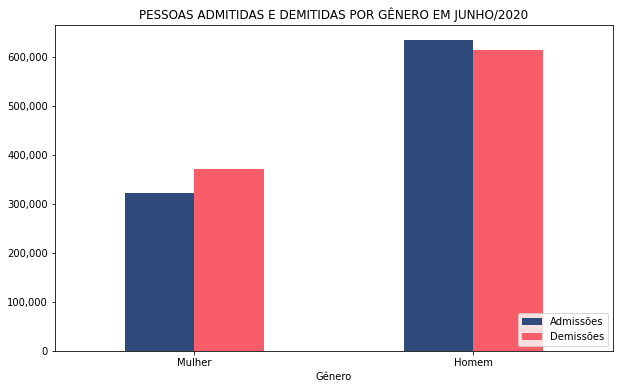

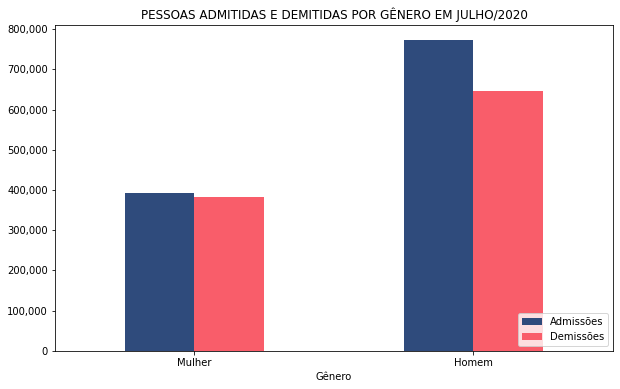

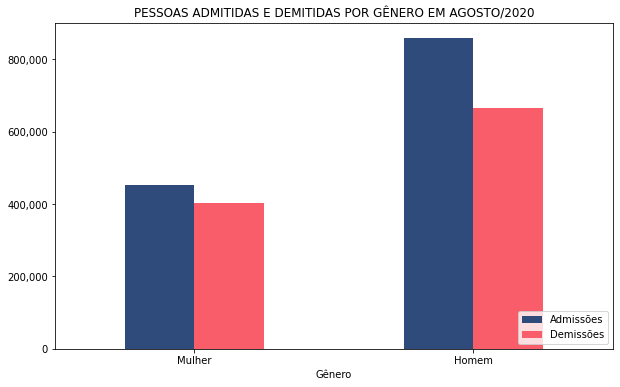

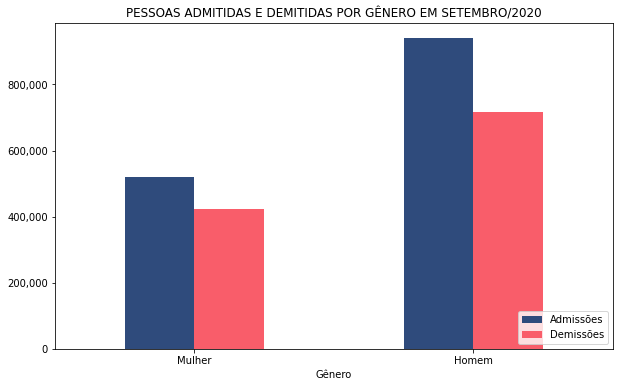

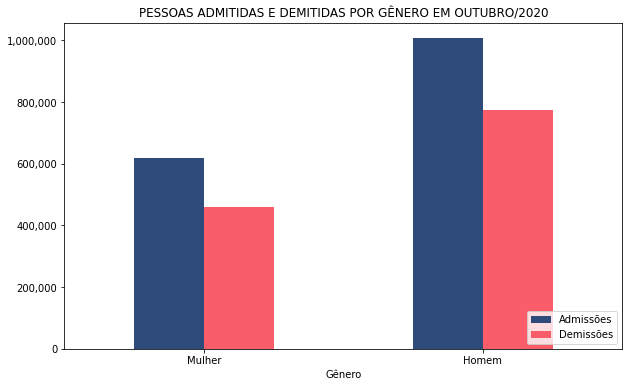

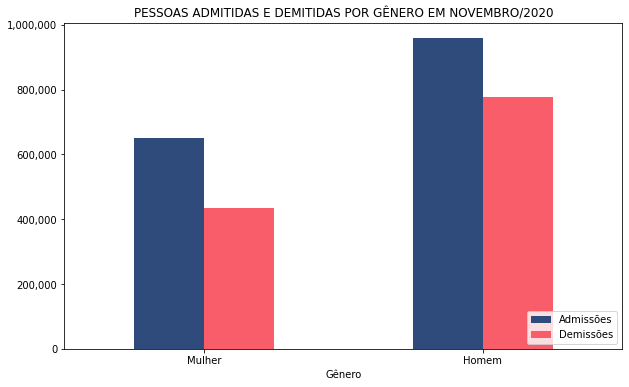

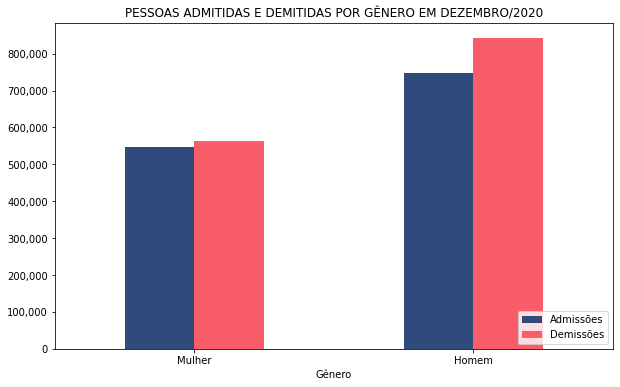

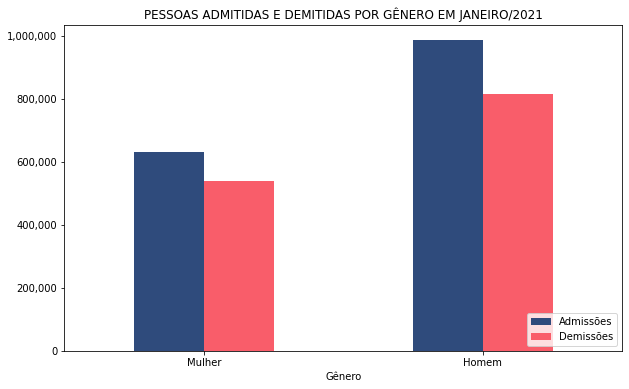

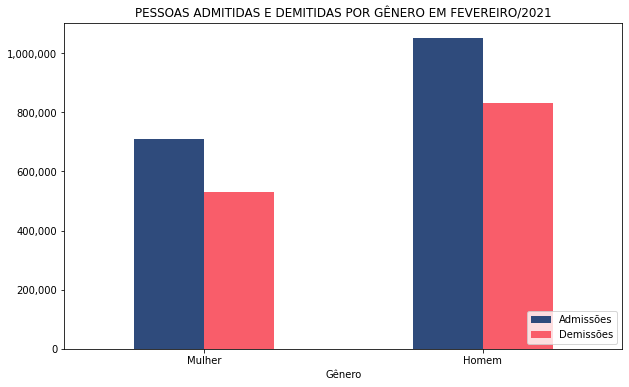

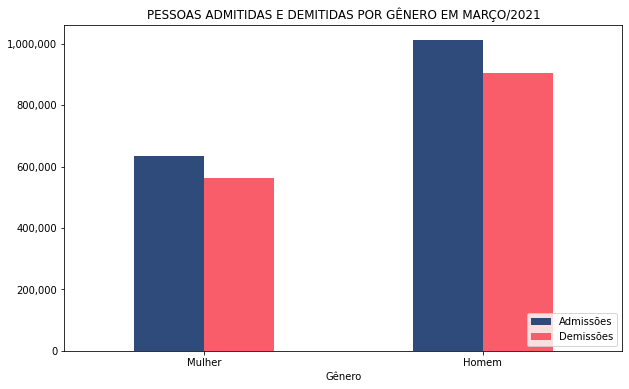

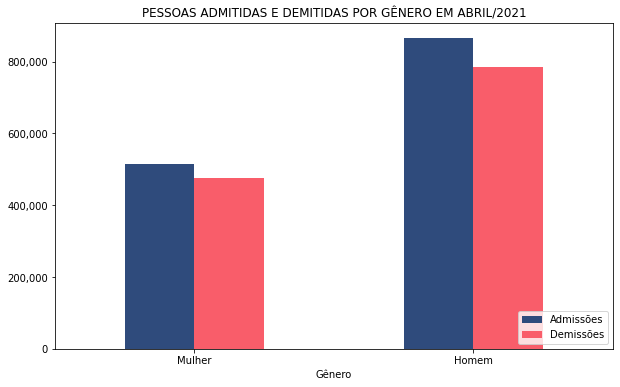

In [5]:
# lista de todos os arquivos
# caged_files = sorted(glob('teste/CAGEDMOV202101.txt'))
# concatena os arquivos
# file = 'teste/CAGEDMOV202101.txt'

for arquivo in arquivos:
    pandemia_df = loadDataFrame(arquivo)
    questao01e_df = prepareDataframe(pandemia_df, 'sexo', sexo_dic)
    competencia = mes[str(arquivo)[12:-4]] + "/"+ str(arquivo)[8:-6]
    generateChart(questao01e_df, 'sexo', competencia, "gênero")